In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [3]:
#Cargar datos
df = pd.read_csv('Mall_Customers.csv')

In [4]:
# Realizamos lectura de los Datos para el análisis exploratorio

df.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [31]:
# Preparar la matriz de características para el clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

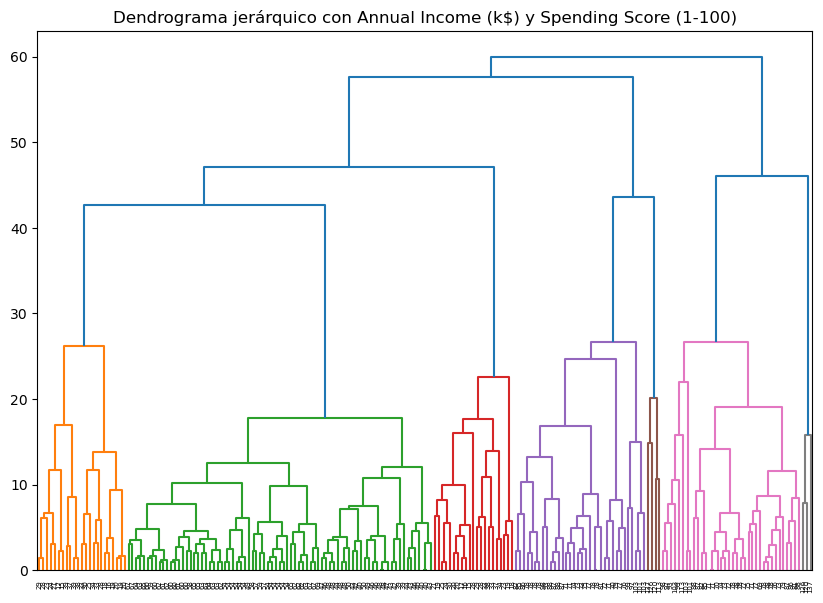

In [34]:
# Realizar el clustering jerárquico
linked = linkage (X, 'average')

#Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation = 'top',
           labels = df['Annual Income (k$)'].astype(str).values,
           distance_sort = 'descending',
           show_leaf_counts = True)
plt.title('Dendrograma jerárquico con Annual Income (k$) y Spending Score (1-100)')
plt.show()

In [35]:
# Decidir el número de clústeres basado en el dendrograma y aplicar el modelo
clustering = AgglomerativeClustering(n_clusters = 7, linkage = 'average')
clustering.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [36]:
# Añadir la asignación de clústeres al DataFrame
df['Cluster'] = clustering.labels_

In [37]:
# Calcular y mostrar las métricas de evaluación
silhouette_avg = silhouette_score(X, clustering.labels_)
davies_bouldin = davies_bouldin_score(X, clustering.labels_)
calinski_harabasz = calinski_harabasz_score(X, clustering.labels_)

print(f"Coeficiente de Silueta: {silhouette_avg}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

Coeficiente de Silueta: 0.5394010876310338
Índice de Davies-Bouldin: 0.5529740686056213
Índice de Calinski-Harabasz: 231.08835935124816


Interpretación de resultados

1. Coeficiente de Silueta: 0.539: Un valor de 0.539 sugiere que, en general, los clústeres están bien formados, con una separación razonable entre ellos y una cohesión aceptable dentro de los clústeres. No es excelente, pero sí bastante bueno.
2. Índice de Davies-Bouldin: 0.552: Un valor de 0.553 es bastante bajo, lo cual indica que los clústeres están bien separados y son relativamente compactos, lo que sugiere una buena calidad del agrupamiento.
3. Índice de Calinski-Harabasz: 231.088: Un valor de 231.088 es un valor bastante alto, lo que sugiere que los clústeres están bien definidos y que la separación entre los clústeres es significativa en comparación con la dispersión dentro de los mismos.

Interpretación Global

Combinando estos índices, se puede concluir que el agrupamiento jerárquico realizado tiene una buena calidad:

- Los clústeres son razonablemente cohesionados y están bien separados, como lo indica el coeficiente de silueta.
- La compactación y separación de los clústeres es buena, como lo refleja el índice de Davies-Bouldin.
- La estructura de los clústeres es robusta, evidenciada por el alto valor del índice de Calinski-Harabasz.

En resumen, los clústeres resultantes del agrupamiento jerárquico parecen ser de buena calidad, con una separación y cohesión adecuadas, lo cual sugiere que los datos están bien agrupados.







